<a href="https://colab.research.google.com/github/harsh-tambi/TEXT_Classification_RNN/blob/main/NLPDLTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
sentences = [
    'I like eggs and ham',
    'I hate onions',
    'I love chocolate and bunnies'
]


In [4]:
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

In [5]:
sequences

[[1, 3, 4, 2, 5], [1, 6, 7], [1, 8, 9, 2, 10]]

In [7]:
tokenizer.word_index

{'i': 1,
 'and': 2,
 'like': 3,
 'eggs': 4,
 'ham': 5,
 'hate': 6,
 'onions': 7,
 'love': 8,
 'chocolate': 9,
 'bunnies': 10}

In [8]:

data = pad_sequences(sequences)

In [9]:
data

array([[ 1,  3,  4,  2,  5],
       [ 0,  0,  1,  6,  7],
       [ 1,  8,  9,  2, 10]], dtype=int32)

In [10]:
MAX_SEQUENCE_LENGTH = 5
data = pad_sequences(sequences, maxlen = MAX_SEQUENCE_LENGTH)

In [11]:
data

array([[ 1,  3,  4,  2,  5],
       [ 0,  0,  1,  6,  7],
       [ 1,  8,  9,  2, 10]], dtype=int32)

In [12]:
MAX_SEQUENCE_LENGTH = 5
data = pad_sequences(sequences, maxlen = MAX_SEQUENCE_LENGTH, padding='post')

In [13]:
data

array([[ 1,  3,  4,  2,  5],
       [ 1,  6,  7,  0,  0],
       [ 1,  8,  9,  2, 10]], dtype=int32)

In [ ]:
# This is how texts can be tranformed into numbers for computers to processs

#Now let's try doing spam detection using Simple Rnns

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Flatten, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model


In [16]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2023-08-11 09:31:57--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2023-08-11 09:31:57 ERROR 403: Forbidden.



In [17]:
ls

sample_data/  spam.csv


In [26]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [27]:
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [29]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [30]:
df.head(

)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df.columns = ['labels', 'data']

In [32]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
df['b_lables'] = df['labels'].map({'ham':0, 'spam':1})

In [35]:
df.head()

,labels,data,b_lables
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [36]:
Y = df['b_lables'].values

In [37]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [38]:
df_train, df_test, Y_train, Y_test = train_test_split(df['data'], Y, test_size=0.33)

In [39]:
#No we need to convert our sequences of sentences into numbers and vectors, so that computers and deep learnign methods are able to idnetify if this is spam or not

In [40]:
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)


In [41]:
word2idx = tokenizer.word_index

In [42]:
V = len(word2idx)

In [43]:
V

7153

In [44]:
data_train = pad_sequences(sequences_train)
data_train.shape

(3733, 174)

In [45]:
data_train

array([[   0,    0,    0, ...,  550,  653,   63],
       [   0,    0,    0, ...,   22,   38,  654],
       [   0,    0,    0, ...,  655,  157,    6],
       ...,
       [   0,    0,    0, ...,  379,  365,  275],
       [   0,    0,    0, ...,    4,  219,   61],
       [   0,    0,    0, ...,   10,    8, 1863]], dtype=int32)

In [46]:
T = data_train.shape[1]

In [47]:
T

174

In [48]:
data_test = pad_sequences(sequences_test, maxlen=T)
data_test.shape

(1839, 174)

In [ ]:
#Now we create the model using what we havce learnt


In [49]:
D = 20

M = 15

i = Input(shape=(T, ))
x = Embedding(V+1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)


In [50]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print ('This is our training model......')

This is our training model......


In [51]:
print ('This is our training model......')
r = model.fit(
    data_train,
    Y_train,
    epochs=10,
    validation_data=(data_test, Y_test)
)


This is our training model......
Epoch 1/10
117/117 [==============================] - 16s 106ms/step - loss: 0.4777 - accuracy: 0.8690 - val_loss: 0.4113 - val_accuracy: 0.8564
Epoch 2/10
117/117 [==============================] - 13s 111ms/step - loss: 0.3843 - accuracy: 0.8706 - val_loss: 0.4078 - val_accuracy: 0.8564
Epoch 3/10
117/117 [==============================] - 12s 99ms/step - loss: 0.3780 - accuracy: 0.8706 - val_loss: 0.3973 - val_accuracy: 0.8564
Epoch 4/10
117/117 [==============================] - 11s 95ms/step - loss: 0.3361 - accuracy: 0.8706 - val_loss: 0.3071 - val_accuracy: 0.8564
Epoch 5/10
117/117 [==============================] - 12s 100ms/step - loss: 0.2431 - accuracy: 0.8706 - val_loss: 0.2212 - val_accuracy: 0.8564
Epoch 6/10
117/117 [==============================] - 12s 103ms/step - loss: 0.1664 - accuracy: 0.9349 - val_loss: 0.1504 - val_accuracy: 0.9712
Epoch 7/10
117/117 [==============================] - 12s 103ms/step - loss: 0.0835 - accuracy: 0.9

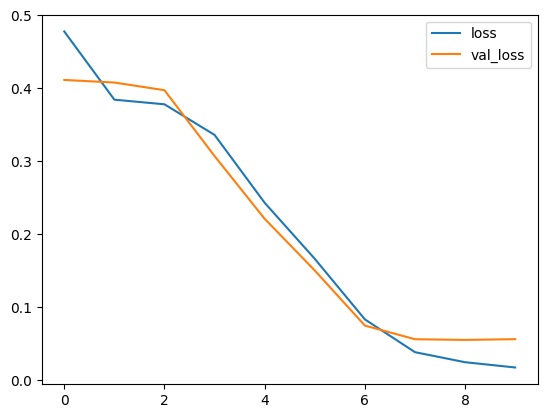

In [52]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()